# 导包与数据挖掘

## 背景
## 火力发电的基本原理是：燃料在燃烧时加热水生成蒸汽，蒸汽压力推动汽轮机旋转，然后汽轮机带动发电机旋转，产生电能。在这一系列的能量转化中，影响发电效率的核心是锅炉的燃烧效率，即燃料燃烧加热水产生高温高压蒸汽。锅炉的燃烧效率的影响因素很多，包括锅炉的可调参数，如燃烧给量，一二次风，引风，返料风，给水水量；以及锅炉的工况，比如锅炉床温、床压，炉膛温度、压力，过热器的温度等。


## 导包

In [125]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,cross_val_predict,KFold
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler



## 数据读取

In [126]:
#加载数据
data_train = pd.read_csv('./zhengqi_train.txt',sep = '\t')

data_test = pd.read_csv('./zhengqi_test.txt',sep = '\t')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

In [127]:
#合并训练数据和测试数据
data_train["oringin"]="train"
data_test["oringin"]="test"
df=pd.concat([data_train,data_test],axis=0,ignore_index=True)
#显示前5条数据
data_test=data_test.drop('oringin',axis=1)
data_test.columns

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4813 entries, 0 to 4812
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   V0       4813 non-null   float64
 1   V1       4813 non-null   float64
 2   V2       4813 non-null   float64
 3   V3       4813 non-null   float64
 4   V4       4813 non-null   float64
 5   V5       4813 non-null   float64
 6   V6       4813 non-null   float64
 7   V7       4813 non-null   float64
 8   V8       4813 non-null   float64
 9   V9       4813 non-null   float64
 10  V10      4813 non-null   float64
 11  V11      4813 non-null   float64
 12  V12      4813 non-null   float64
 13  V13      4813 non-null   float64
 14  V14      4813 non-null   float64
 15  V15      4813 non-null   float64
 16  V16      4813 non-null   float64
 17  V17      4813 non-null   float64
 18  V18      4813 non-null   float64
 19  V19      4813 non-null   float64
 20  V20      4813 non-null   float64
 21  V21      4813 

In [129]:
df.describe()

V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.000080     0.000082    -0.000043    -0.000013     0.000085   
std       1.000013     1.000016     1.000007     0.999995     1.000015   
min      -4.814000    -5.488000    -4.283000    -3.956000    -4.921000   
25%      -0.468000    -0.319000    -0.625000    -0.651000    -0.428000   
50%       0.245000     0.237000     0.105000     0.073000     0.114000   
75%       0.666000     0.595000     0.698000     0.704000     0.576000   
max       2.121000     2.120000     2.828000     2.603000     4.475000   

                V5           V6           V7           V8           V9  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.000023     0.000118     0.000116     0.000049     0.000357  ...   
std       0.999996     1.000035     1.000030     0.999994     1.000257  ...   
min      -2.182000    -5.649000    -5.625000    -6.059000   -12.891000  ...   
25%      -0.583000    -0.494000    -0.368000    -0.429000    -0.390000  ...   
50%      -0.133000     0.191000     0.198000     0.231000     0.042000  ...   
75%       0.284000     0.705000     0.684000     0.637000     0.904000  ...   
max       3.176000     1.895000     1.918000     2.408000     1.766000  ...   

               V29          V30          V31          V32          V33  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.000014     0.000006    -0.000004     0.000173     0.000108   
std       0.999997     0.999993     0.999999     1.000077     1.000068   
min      -2.912000    -4.507000    -7.698000    -4.057000    -4.627000   
25%      -0.721000    -0.301000    -0.300000    -0.428000    -0.499000   
50%      -0.097000     0.038000     0.217000     0.092000    -0.040000   
75%       0.623000     0.469000     0.578000     0.587000     0.419000   
max       4.580000     3.139000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  4813.000000  4813.000000  4813.000000  4813.000000  2888.000000  
mean      0.000036    -0.000079    -0.000110     0.000083     0.126353  
std       0.999998     1.000062     1.000019     1.000017     0.983966  
min      -4.789000    -7.477000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.349000    -0.485000    -0.666000    -0.350250  
50%       0.160000     0.364000     0.115000    -0.043000     0.313000  
75%       0.273000     0.364000     0.647000     0.647000     0.793250  
max       5.110000     2.324000     5.238000     3.021000     2.538000  

[8 rows x 39 columns]

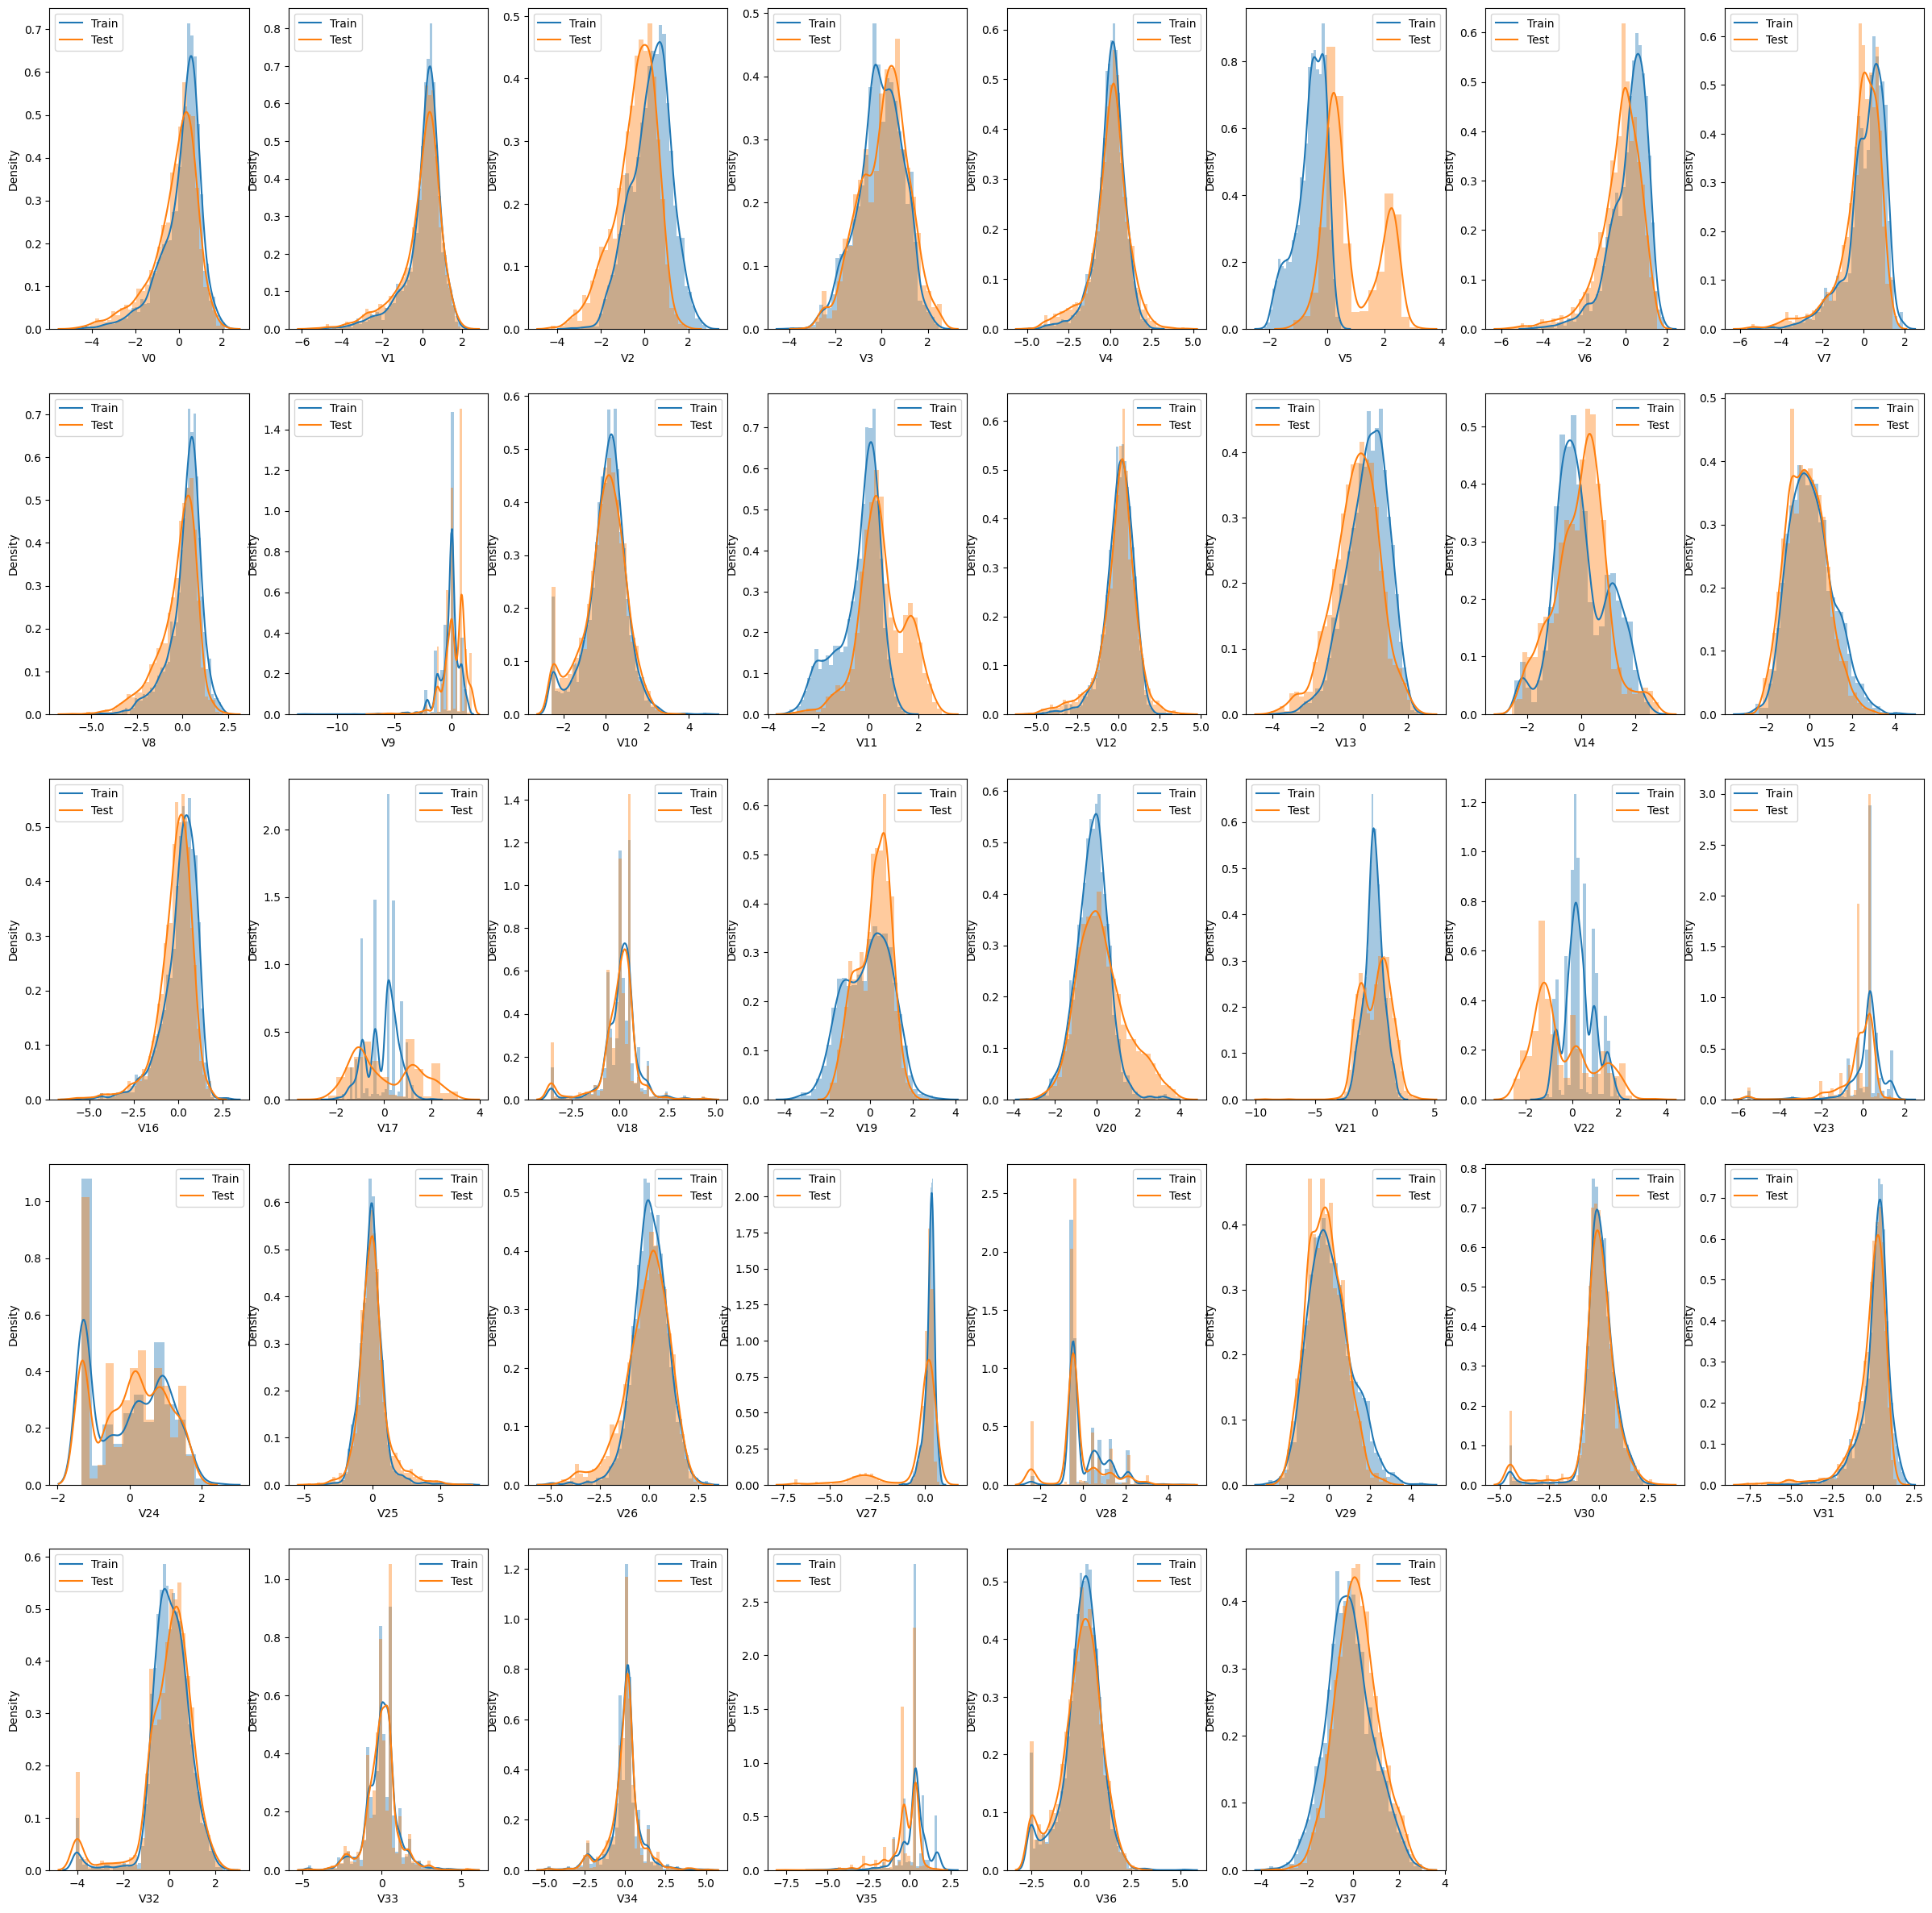

In [130]:
plt.figure(figsize=(30,30))
i = 1
for col in data_test.columns:
	
	plt.subplot(5,8,i)
	sns.distplot(data_train[col])
	sns.distplot(data_test[col])
	plt.legend(['Train', 'Test'])   
	i += 1


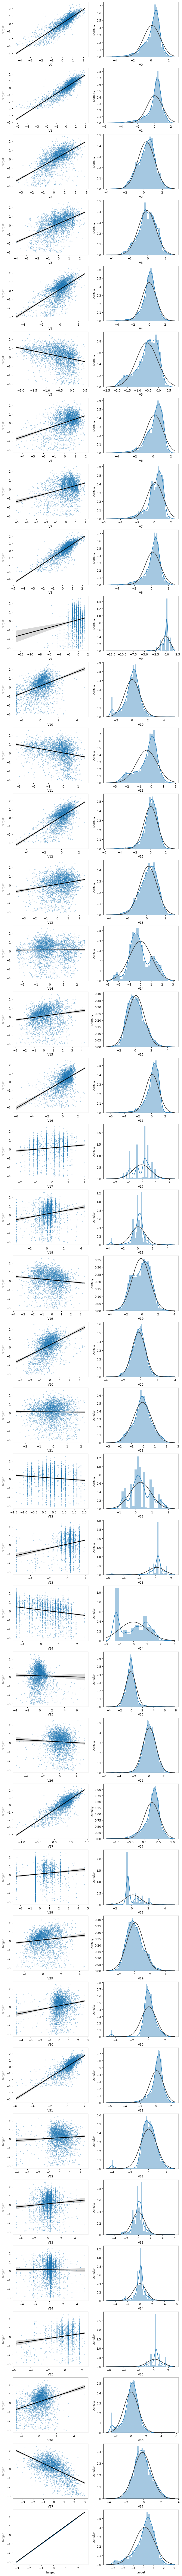

In [131]:
data_train1=df[df["oringin"]=="train"].drop("oringin",axis=1)

fcols = 2
frows = len(data_train.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in data_train1.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=data_train, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(data_train[col].dropna() , fit=stats.norm)
    plt.xlabel(col)


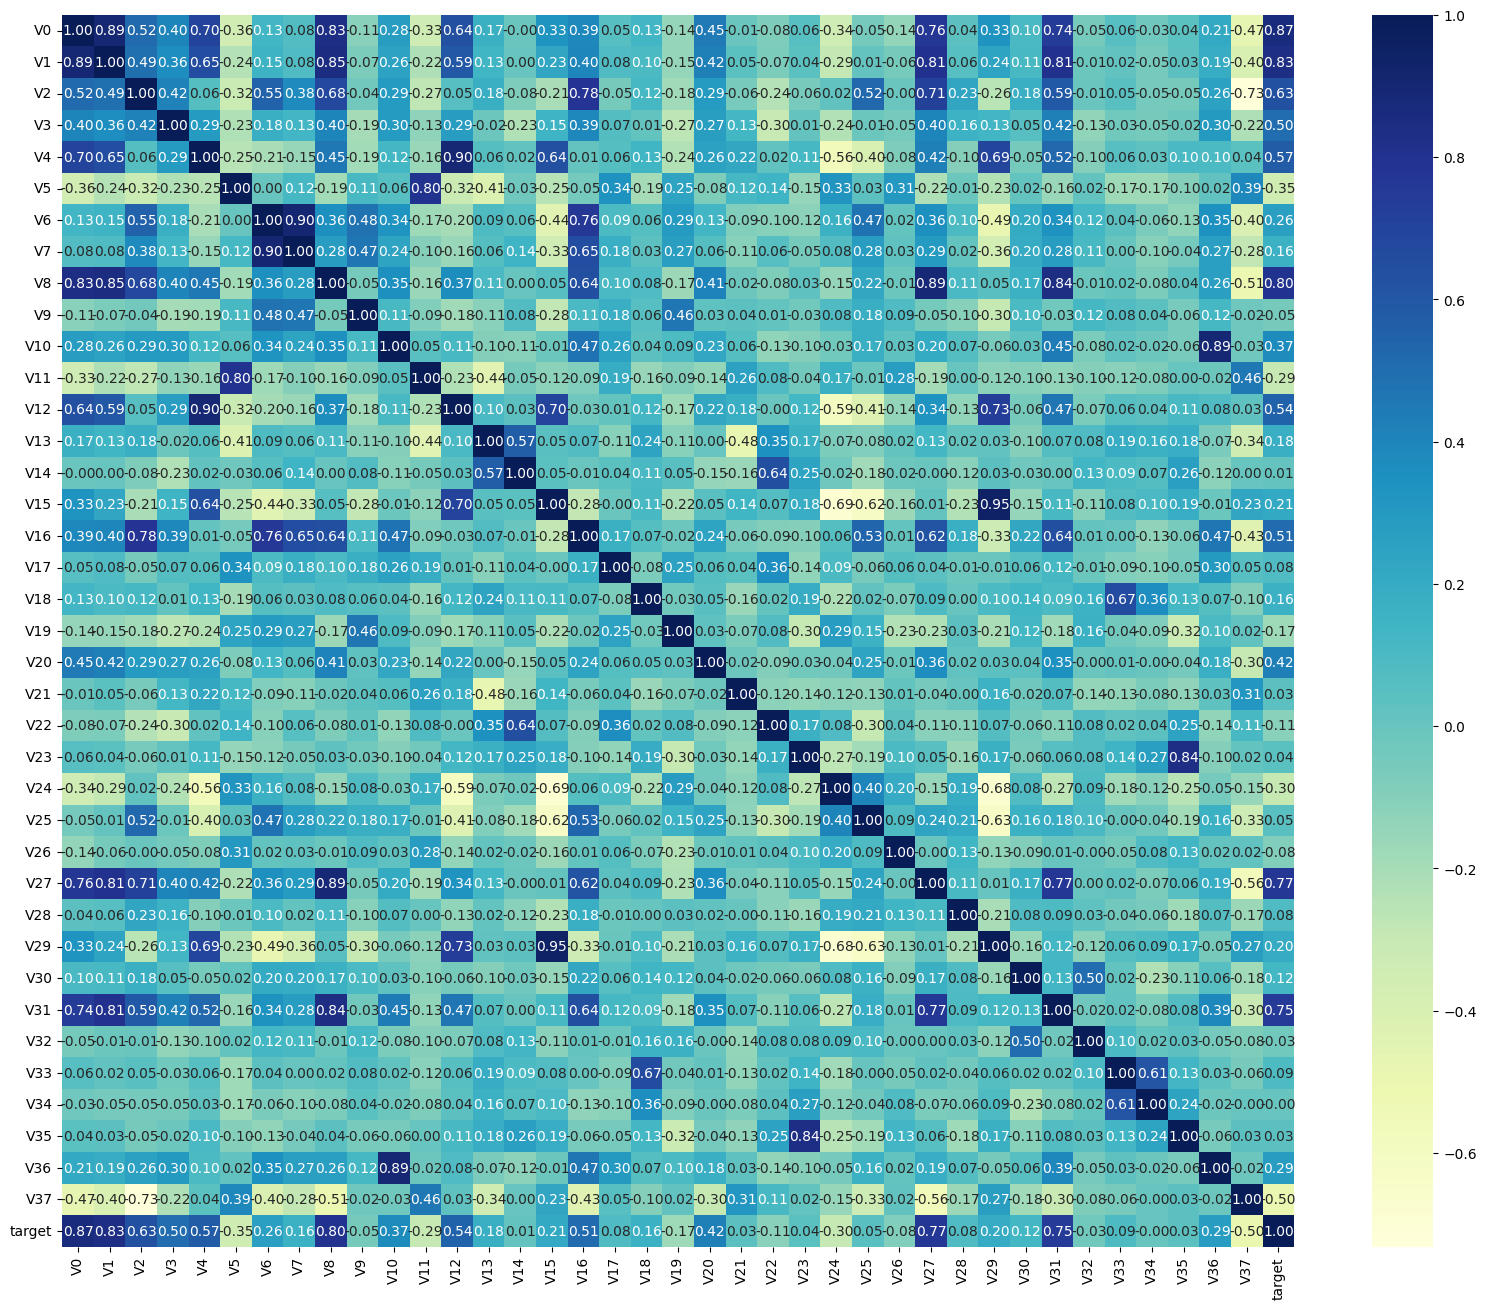

In [132]:
plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = data_train1.columns.tolist()  # 列表头
mcorr = data_train1[colnm].corr(method="spearman")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
# mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
# mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
# cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, cmap="YlGnBu", square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()


## 删除与目标值相关度不高的特征

In [133]:

threshold = 0.1
# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
df.drop(drop_col,axis=1,inplace=True)



## 归一化

In [134]:
# normalise numeric columns
cols_numeric=list(df.columns)
cols_numeric.remove("oringin")
def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())
scale_cols = [col for col in cols_numeric if col!='target']
df[scale_cols] = df[scale_cols].apply(scale_minmax,axis=0)
df[scale_cols].describe()


V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.602300     0.603139     0.523743   
std       0.144198     0.131443     0.140628     0.152462     0.106430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.514414     0.503888     0.478182   
50%       0.729488     0.752497     0.617072     0.614270     0.535866   
75%       0.790195     0.799553     0.700464     0.710474     0.585036   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V5           V6           V7           V8           V9  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.407246     0.748823     0.745740     0.715607     0.879536  ...   
std       0.186636     0.132560     0.132577     0.118105     0.068244  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.298432     0.683324     0.696938     0.664934     0.852903  ...   
50%       0.382419     0.774125     0.771974     0.742884     0.882377  ...   
75%       0.460246     0.842259     0.836405     0.790835     0.941189  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V23          V24          V27          V28          V29  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.744438     0.356712     0.881401     0.342653     0.388683   
std       0.134085     0.265512     0.128221     0.140731     0.133475   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.719362     0.040616     0.888575     0.278778     0.292445   
50%       0.788817     0.381736     0.916015     0.279904     0.375734   
75%       0.792706     0.574728     0.932555     0.413031     0.471837   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V30          V31          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.589459     0.792709     0.762873     0.332385     0.545795  
std       0.130786     0.102976     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.550092     0.761816     0.727273     0.270584     0.445647  
50%       0.594428     0.815055     0.800020     0.347056     0.539317  
75%       0.650798     0.852229     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 31 columns]

In [135]:
df.head()

V0        V1        V2        V3        V4        V5        V6  \
0  0.775775  0.723449  0.582197  0.665193  0.571839  0.239082  0.508616   
1  0.833742  0.778785  0.611588  0.689434  0.544381  0.240575  0.541225   
2  0.840231  0.796004  0.635354  0.659552  0.535653  0.258492  0.567603   
3  0.799856  0.769716  0.642104  0.628297  0.587484  0.280515  0.589740   
4  0.792790  0.805205  0.638869  0.635005  0.559600  0.322508  0.606575   

         V7        V8       V9  ...       V27       V28       V29       V30  \
0  0.432852  0.664108  0.73528  ...  0.902936  0.279341  0.406834  0.603714   
1  0.432852  0.754813  0.73528  ...  0.924734  0.437095  0.371596  0.605676   
2  0.432852  0.762372  0.73528  ...  0.923195  0.523783  0.387480  0.636673   
3  0.469177  0.763198  0.73528  ...  0.916912  0.525331  0.390683  0.643997   
4  0.469177  0.752687  0.73528  ...  0.923965  0.524064  0.413107  0.730447   

        V31       V35       V36       V37  target  oringin  
0  0.729379  0.242424  0.000000  0.018343   0.175    train  
1  0.796005  0.800020  0.289702  0.436025   0.676    train  
2  0.821234  0.800020  0.429901  0.457224   0.633    train  
3  0.821440  0.800020  0.374841  0.528943   0.206    train  
4  0.826485  0.800020  0.296712  0.541573   0.384    train  

[5 rows x 33 columns]

In [147]:
train=df[df.oringin=='train']
test=df[df.oringin=='test']
train.head()

V0        V1        V2        V3        V4        V5        V6  \
0  0.775775  0.723449  0.582197  0.665193  0.571839  0.239082  0.508616   
1  0.833742  0.778785  0.611588  0.689434  0.544381  0.240575  0.541225   
2  0.840231  0.796004  0.635354  0.659552  0.535653  0.258492  0.567603   
3  0.799856  0.769716  0.642104  0.628297  0.587484  0.280515  0.589740   
4  0.792790  0.805205  0.638869  0.635005  0.559600  0.322508  0.606575   

         V7        V8       V9  ...       V27       V28       V29       V30  \
0  0.432852  0.664108  0.73528  ...  0.902936  0.279341  0.406834  0.603714   
1  0.432852  0.754813  0.73528  ...  0.924734  0.437095  0.371596  0.605676   
2  0.432852  0.762372  0.73528  ...  0.923195  0.523783  0.387480  0.636673   
3  0.469177  0.763198  0.73528  ...  0.916912  0.525331  0.390683  0.643997   
4  0.469177  0.752687  0.73528  ...  0.923965  0.524064  0.413107  0.730447   

        V31       V35       V36       V37  target  oringin  
0  0.729379  0.242424  0.000000  0.018343   0.175    train  
1  0.796005  0.800020  0.289702  0.436025   0.676    train  
2  0.821234  0.800020  0.429901  0.457224   0.633    train  
3  0.821440  0.800020  0.374841  0.528943   0.206    train  
4  0.826485  0.800020  0.296712  0.541573   0.384    train  

[5 rows x 33 columns]

In [148]:
train_x=train.drop(['target','oringin'],axis=1)

In [149]:
train_x

V0        V1        V2        V3        V4        V5        V6  \
0     0.775775  0.723449  0.582197  0.665193  0.571839  0.239082  0.508616   
1     0.833742  0.778785  0.611588  0.689434  0.544381  0.240575  0.541225   
2     0.840231  0.796004  0.635354  0.659552  0.535653  0.258492  0.567603   
3     0.799856  0.769716  0.642104  0.628297  0.587484  0.280515  0.589740   
4     0.792790  0.805205  0.638869  0.635005  0.559600  0.322508  0.606575   
...        ...       ...       ...       ...       ...       ...       ...   
2883  0.721557  0.718060  0.582900  0.627687  0.587590  0.367675  0.849152   
2884  0.767267  0.794558  0.643932  0.631041  0.580140  0.363009  0.848091   
2885  0.637347  0.626577  0.534102  0.615948  0.538208  0.413587  0.835631   
2886  0.662581  0.684280  0.553931  0.595670  0.571520  0.381112  0.823038   
2887  0.747224  0.771293  0.570665  0.595670  0.564070  0.424412  0.821713   

            V7        V8        V9  ...       V23       V24       V27  \
0     0.432852  0.664108  0.735280  ...  0.792169  0.569153  0.902936   
1     0.432852  0.754813  0.735280  ...  0.792304  0.569419  0.924734   
2     0.432852  0.762372  0.735280  ...  0.792035  0.611893  0.923195   
3     0.469177  0.763198  0.735280  ...  0.791633  0.737722  0.916912   
4     0.469177  0.752687  0.735280  ...  0.791633  0.590656  0.923965   
...        ...       ...       ...  ...       ...       ...       ...   
2883  0.823147  0.712531  0.941189  ...  0.720971  0.009026  0.905629   
2884  0.823147  0.779024  0.941189  ...  0.719764  0.007964  0.929093   
2885  0.827124  0.618991  0.941189  ...  0.719094  0.009026  0.888832   
2886  0.823015  0.645211  0.941189  ...  0.757576  0.008229  0.898449   
2887  0.818772  0.744420  0.941189  ...  0.757576  0.007964  0.908065   

           V28       V29       V30       V31       V35       V36       V37  
0     0.279341  0.406834  0.603714  0.729379  0.242424  0.000000  0.018343  
1     0.437095  0.371596  0.605676  0.796005  0.800020  0.289702  0.436025  
2     0.523783  0.387480  0.636673  0.821234  0.800020  0.429901  0.457224  
3     0.525331  0.390683  0.643997  0.821440  0.800020  0.374841  0.528943  
4     0.524064  0.413107  0.730447  0.826485  0.800020  0.296712  0.541573  
...        ...       ...       ...       ...       ...       ...       ...  
2883  0.279482  0.405766  0.562255  0.876017  0.727273  0.405812  0.648925  
2884  0.280889  0.427523  0.551923  0.840593  0.727273  0.254015  0.488648  
2885  0.280045  0.427523  0.566048  0.820307  0.727273  0.453607  0.658247  
2886  0.279623  0.417512  0.728224  0.787458  0.739414  0.294035  0.629229  
2887  0.279482  0.394955  0.596913  0.788384  0.743496  0.260133  0.604120  

[2888 rows x 31 columns]

In [151]:
train_y=train.target
train_y

0       0.175
1       0.676
2       0.633
3       0.206
4       0.384
        ...  
2883    0.235
2884    1.042
2885    0.005
2886    0.350
2887    0.417
Name: target, Length: 2888, dtype: float64

In [152]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.3, random_state = 827)


In [153]:
# 线性回归
def Linear_Regression(X_train,X_test,y_train,y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))

    print('Linear_Regression的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('Linear_Regression的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('Linear_Regression的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------')


In [154]:
# SVM
def Linear_SVR(X_train,X_test,y_train,y_test):
    model = LinearSVR()
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))
    
    print('Linear_SVR的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('Linear_SVR的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('Linear_SVR的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------')    


In [155]:
# 随机森林
def RandomForest_Regressor(X_train,X_test,y_train,y_test,n_estimators = 70):
    model = RandomForestRegressor(n_estimators= n_estimators)
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))
    print('RandomForest_Regressor的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('RandomForest_Regressor的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('RandomForest_Regressor的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------') 


In [156]:
# XGBRegression
def XGB_Regressor(X_train,X_test,y_train,y_test):
    model = XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train,y_train)
    mse = mean_squared_error(y_test,model.predict(X_test))
    print('XGB_Regressor的训练集得分：{}'.format(model.score(X_train,y_train)))
    print('XGB_Regressor的测试集得分：{}'.format(model.score(X_test,y_test)))
    print('XGB_Regressor的测试集的MSE得分为：{}'.format(mse))
    print('--------------------------------')   


In [157]:

Linear_Regression(X_train, X_test, y_train, y_test)
Linear_SVR(X_train, X_test, y_train, y_test)
RandomForest_Regressor(X_train, X_test, y_train, y_test, n_estimators = 70)
XGB_Regressor(X_train, X_test, y_train, y_test)


Linear_Regression的训练集得分：0.887632436670823
Linear_Regression的测试集得分：0.8849388109762208
Linear_Regression的测试集的MSE得分为：0.12159495315033544
--------------------------------
Linear_SVR的训练集得分：0.8770156406478862
Linear_SVR的测试集得分：0.8732643879763192
Linear_SVR的测试集的MSE得分为：0.13393230973229167
--------------------------------
RandomForest_Regressor的训练集得分：0.9809256079317865
RandomForest_Regressor的测试集得分：0.8711996764420122
RandomForest_Regressor的测试集的MSE得分为：0.13611426617140973
--------------------------------
XGB_Regressor的训练集得分：0.9992912981865723
XGB_Regressor的测试集得分：0.8753998851983266
XGB_Regressor的测试集的MSE得分为：0.1316755480312719
--------------------------------


In [158]:
# 得出每个模型的predict

lr=LinearRegression()
lr.fit(X_train,y_train)
linear_predict = lr.predict(X_test)

svr=LinearSVR()
svr.fit(X_train,y_train)
svr_predict = svr.predict(X_test)

rf=RandomForestRegressor(n_estimators = 200, max_features = 'sqrt')
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)

xgb=XGBRegressor(learning_rate = 0.1, 
                 n_estimators = 200, 
                 max_depth = 6, 
                 min_child_weight =9, 
                 seed = 0,
                 subsample = 0.8, 
                 colsample_bytree = 0.8, 
                 gamma = 0.3, 
                 reg_alpha = 0, 
                 reg_lambda = 1,
                objective ='reg:squarederror')
xgb.fit(X_train,y_train)
xgb_predict = xgb.predict(X_test)
